In [2]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import Binarizer
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
sns.set_theme(style="darkgrid")


In [3]:
iris = sns.load_dataset("iris")
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [5]:
df=iris
label_col=iris.iloc[:,4]
le = preprocessing.LabelEncoder()
le.fit(label_col)
encoded_col=le.transform(label_col)
df.iloc[:,4]=encoded_col
# df

### 类别特征编码

In [6]:
def Label_Encode(df,label_col_index):
    label_col=iris.iloc[:,label_col_index]
    le = preprocessing.LabelEncoder()
    le.fit(label_col)
    encoded_col=le.transform(label_col)
    df.iloc[:,label_col_index]=encoded_col
    return df
df_test=Label_Encode(df,4)
df_test

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


## 可视化

### 分类数据，以条形图为例

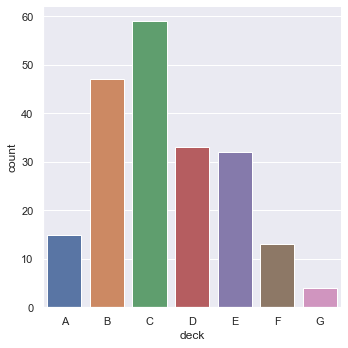

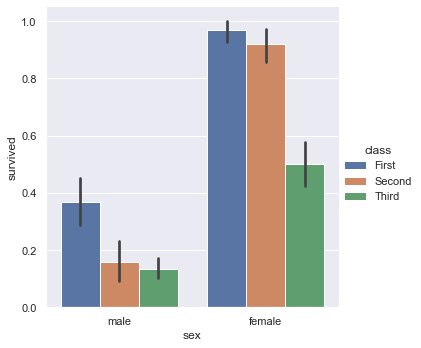

In [17]:
titanic = sns.load_dataset("titanic")
# sns.catplot(x="sex", y="survived", hue="class", kind="bar", data=titanic)
# sns.catplot(x="deck", kind="count", data=titanic)
def bar_plot_MulVar(df,x_name,y_name,hue_name):
    sns.catplot(x=x_name, y=y_name, hue=hue_name,kind="bar",data=df)
def bar_plot_UniVar(df,x_name):
    sns.catplot(x=x_name, kind="count", data=df)
bar_plot_UniVar(titanic,"deck")
bar_plot_MulVar(titanic,"sex", "survived", "class")

### 分组数据(数值型数据)，以直方图、箱线图、散点图为例，旨在反映分布情况

C:\ANACONDA3\envs\Simi_com\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\ANACONDA3\envs\Simi_com\lib\site-packages\matplotlib\cbook\__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
C:\ANACONDA3\envs\Simi_com\lib\site-packages\matplotlib\axes\_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
C:\ANACONDA3\envs\Simi_com\lib\site-packages\matplotlib\axes\_base.py:278: F

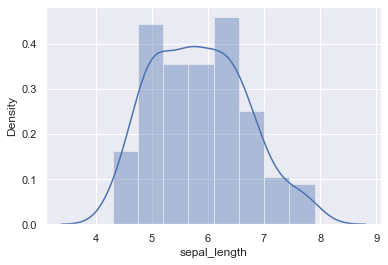

In [25]:
# ax1=sns.histplot(df["sepal_length"])
# ax = sns.distplot(df.iloc[:,0])
# df.iloc[:,0:4].boxplot()
def hist_plot(df,IndexName):
    ax1=sns.histplot(df[IndexName])
def dist_plot(df,IndexName):
    ax = sns.distplot(df[IndexName])
def box_plot(df,Index_A,Index_B):
    df.iloc[:,Index_A:Index_B].boxplot()
# hist_plot(df,"sepal_length")
dist_plot(df,"sepal_length")

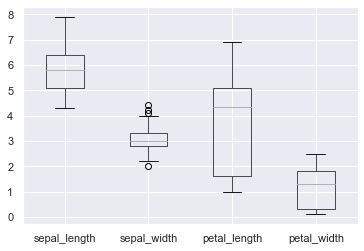

In [26]:
box_plot(df,0,4)

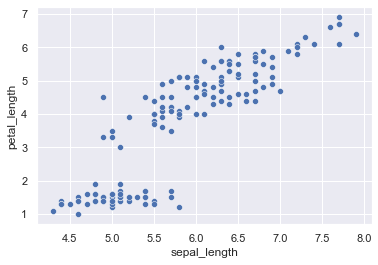

In [35]:
def sca_plot(df,x_name,y_name):
    sns.scatterplot(data=df, x=x_name, y=y_name)
sca_plot(df,"sepal_length","petal_length")

### 时变数据，以折线图为例

In [27]:
flights = sns.load_dataset("flights")
flights.head()

,year,month,passengers
0,1949,Jan,112
1,1949,Feb,118
2,1949,Mar,132
3,1949,Apr,129
4,1949,May,121


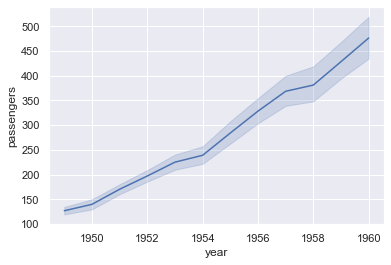

In [32]:
# may_flights = flights.query("month == 'May'")
# sns.lineplot(data=may_flights, x="year", y="passengers")
def line_plot(df,x_name,y_name):
    sns.lineplot(data=flights, x=x_name, y=y_name)
line_plot(flights,"year","passengers")

### 多变量数据，以散点图矩阵为例，第i行第j列散点图反映第i、j个属性的相关关系

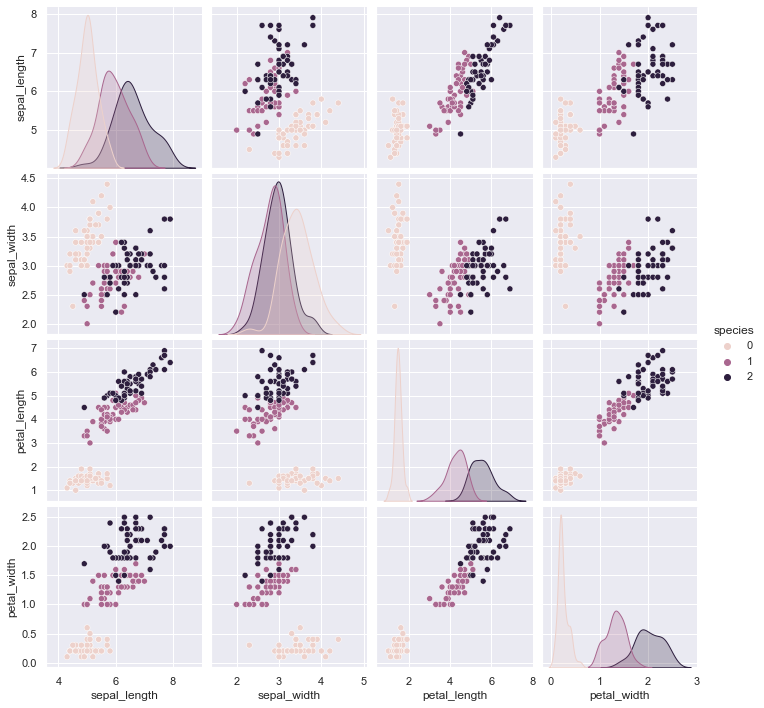

In [34]:
# sns.pairplot(df)
# sns.pairplot(df, hue="species")
def pair_plot(df,hue_name):
    sns.pairplot(df,hue=hue_name)
pair_plot(df,"species")

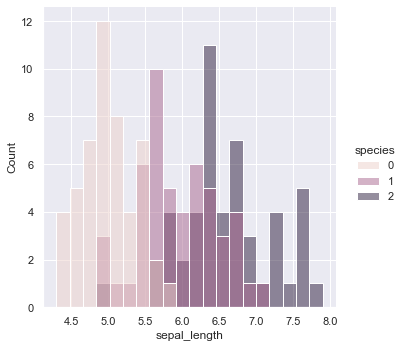

In [36]:
# sns.displot(df, x="sepal_length", hue='species',bins=20)
def dis_plot_MulVar(df,x_name,hue_name,bins_num):
    sns.displot(df, x=x_name, hue=hue_name,bins=bins_num)
dis_plot_MulVar(df,"sepal_length",'species',20)